In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_movies = pd.read_csv('movies.csv')
df_links = pd.read_csv('links.csv')
df_ratings = pd.read_csv('ratings.csv')
df_tags = pd.read_csv('tags.csv')

'''
df = pd.merge(df_movies, df_links, on='movieId', how='left')
df.head()
'''

df_links.head()

,movieId,imdbId,tmdbId
0,45,114681,577.0
1,103,118040,2045.0
2,118,116606,10324.0
3,152,112288,34996.0
4,209,114928,31611.0


In [13]:
print(len(df_links))
df_links.dropna()
df_links.mask(df_links.eq('None')).dropna()
print(len(df_links))

1500
1500


In [14]:
print(len(df_movies))
df_movies.dropna()
df_movies.mask(df_movies.eq('None')).dropna()
print(len(df_movies))

1500
1500


In [15]:
print(len(df_ratings))
df_ratings.dropna()
df_ratings.mask(df_ratings.eq('None')).dropna()
print(len(df_ratings))

503673
503673


In [16]:
print(len(df_tags))
df_tags.dropna()
df_tags.mask(df_tags.eq('None')).dropna()
print(len(df_tags))

35139
35139


In [18]:
df = pd.merge(df_movies, df_links, on='movieId', how='left')
df = pd.merge(df, df_tags, on='movieId', how='left')
#df = pd.merge(df, df_ratings, on='movieId', how='left')
df.head()

,movieId,title,genres,year,director,actors,imdbId,tmdbId,userId,tag,timestamp
0,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,high tech surveillance,1.527060e+09
1,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,mystery killer,1.527060e+09
2,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sex party,1.527060e+09
3,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sexual murder,1.527060e+09
4,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,whodunit,1.527060e+09


In [42]:
print(df['year'].min())
print(df['year'].max())
print(df['timestamp'].min())
print(df['timestamp'].max())

1080.0
9500.0


TypeError: '<=' not supported between instances of 'datetime.date' and 'float'

In [45]:
print(df.timestamp.unique())

<DatetimeArray>
['1970-01-01 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]


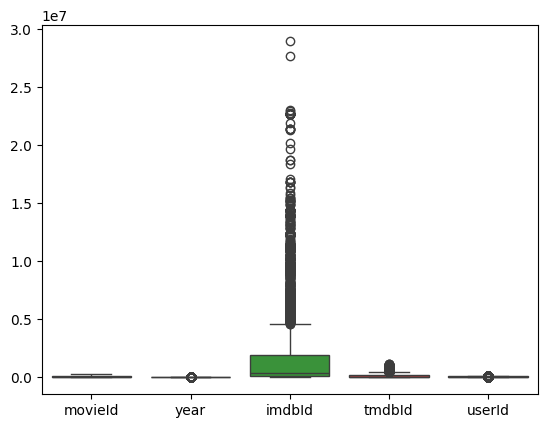

In [33]:
# Selecciona solo columnas numéricas (int64, float64) y excluye 'timestamp'
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
columnas_numericas = [col for col in columnas_numericas if col != 'timestamp']

# Crear el boxplot de las columnas numéricas
sns.boxplot(data=df[columnas_numericas])
plt.show()


In [44]:
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
df.head()

,movieId,title,genres,year,director,actors,imdbId,tmdbId,userId,tag,timestamp
0,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,high tech surveillance,1970-01-01
1,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,mystery killer,1970-01-01
2,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sex party,1970-01-01
3,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sexual murder,1970-01-01
4,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,whodunit,1970-01-01


In [29]:
print(df.shape)

(35764, 11)


In [23]:
from sklearn import preprocessing

columnas_datos = [col for col in df.columns if col != 'movieId']
scaler = preprocessing.MinMaxScaler()
df_normalized = pd.DataFrame()

for col in columnas_datos:
    df_normalized[col] = scaler.fit_transform(np.array(df[col]).reshape(-1, 1)).ravel()

print(type(df_normalized))
df_normalized.head()
#Estos boxplots se han hecho simplemente para ver si hay outliers de manera grafica
sns.boxplot(data=df_normalized.loc[:, df_normalized.columns != 'Group'])
plt.show()

ValueError: could not convert string to float: 'Plot of Fear'

In [46]:
df.to_csv('merged_movies.csv')